## Otras técnicas de aprendizaje no supervisado

Otras técnicas muy usadas de aprendizaje no supervisado son

# ¿Qué es DBSCAN?

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) es un **algoritmo de clustering basado en densidad**, diseñado para encontrar grupos (clústeres) de puntos en espacios con **alta densidad** y, al mismo tiempo, identificar **valores atípicos** o **anomalías** (ruido).

A diferencia de algoritmos como K-means, **DBSCAN** no requiere especificar el número de clústeres de antemano y es capaz de detectar clústeres con **formas arbitrarias**.

## ¿Cómo Funciona DBSCAN?

DBSCAN clasifica los puntos en tres categorías:

1. **Puntos centrales**:  
   Son puntos que tienen al menos un número mínimo de vecinos dentro de una distancia específica. Estos puntos forman el "núcleo" de un clúster.

2. **Puntos alcanzables**:  
   Son puntos que no tienen suficientes vecinos para ser considerados puntos centrales, pero están **cerca de un punto central** y, por lo tanto, pertenecen al mismo clúster.

3. **Ruido**:  
   Son puntos que no tienen suficientes vecinos ni están cerca de puntos centrales, por lo que se consideran **anomalías** o **ruido**.

## Parámetros Clave de DBSCAN

- **Epsilon (ε)**: Es la **distancia máxima** para considerar que dos puntos son vecinos.
- **MinPts**: Es el **número mínimo de puntos** que se requiere para formar un clúster (incluyendo el punto central).

## Algoritmo DBSCAN - Paso a Paso

1. **Seleccionar un punto aleatorio** del conjunto de datos.
2. **Determinar el número de puntos vecinos** dentro de un radio \( \varepsilon \).
3. Si el número de vecinos es **mayor o igual que `MinPts`**, se considera un **punto central** y se comienza un clúster.
4. A partir de este punto central, **se expandirá el clúster**, agregando todos los puntos vecinos que cumplan los criterios.
5. Si un punto no tiene suficientes vecinos y tampoco está conectado a un punto central, se clasifica como **ruido**.
6. El proceso continúa hasta que **todos los puntos han sido procesados**.

## Ventajas de DBSCAN

- **No necesita especificar el número de clústeres** de antemano.
- **Detecta clústeres con formas arbitrarias** (no solo esféricos, como K-means).
- **Identifica valores atípicos (anomalías)** como puntos de ruido.
- Es **robusto** ante datos con ruido.

## Limitaciones de DBSCAN

- **Elección sensible de los parámetros** (\( \varepsilon \) y `MinPts`).
- No funciona bien con datos donde la densidad de los clústeres varía significativamente.
- Puede ser **costoso en términos de tiempo** para conjuntos de datos muy grandes, ya que se evalúa la distancia entre muchos puntos.


Dataset reducido exitosamente a 10,000 puntos


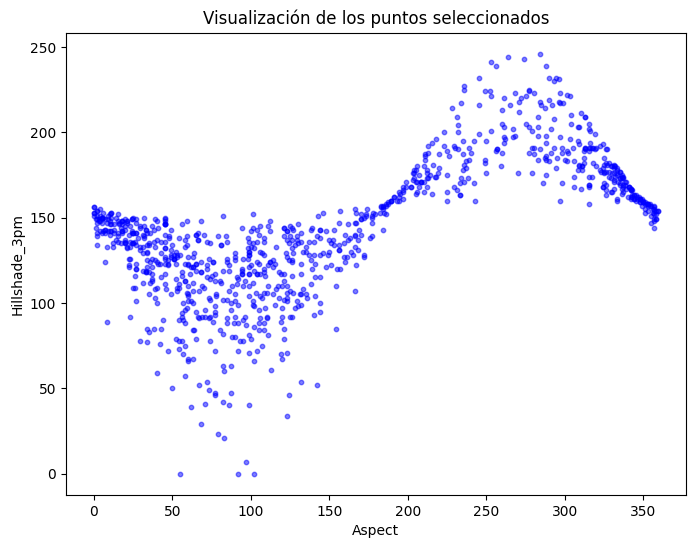

In [ ]:
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv("covtype.csv")

# Selección de columnas relevantes
X = df[['Aspect', 'Hillshade_3pm']].values

# Reducción del dataset usando muestreo aleatorio
np.random.seed(42)  # Asegura reproducibilidad
sample_size = 1000  # Tamaño del nuevo dataset reducido
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_reduced = X[indices]

print("Dataset reducido exitosamente a 10,000 puntos")
# Visualización de los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c='b', alpha=0.5)
plt.title("Visualización de los puntos seleccionados")
plt.xlabel("Aspect")
plt.ylabel("Hillshade_3pm")
plt.show()

- **`eps=0.05`**:  
  Define el **radio** dentro del cual DBSCAN considera que dos puntos son **vecinos**.

- **`min_samples=5`**:  
  Establece el **número mínimo de puntos** que deben estar dentro del radio `eps` para que un punto se considere **núcleo** (core point).
![image.png](attachment:image.png)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.09, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.09)

- **Mostramos las etiquetas asignadas**:   

In [ ]:
labels = dbscan.labels_
print(labels)  # Muestra las etiquetas de los puntos

[    0     1     2 ... 11965  8527  5103]


- **Mostramos las etiquetas asignadas unicos**:  

In [ ]:
np.unique(dbscan.labels_)

array([   -1,     0,     1, ..., 15637, 15638, 15639], dtype=int64)

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([   -1,     0,     1, ..., 15637, 15638, 15639], dtype=int64)

- **Imprimimos el resultado**:  

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

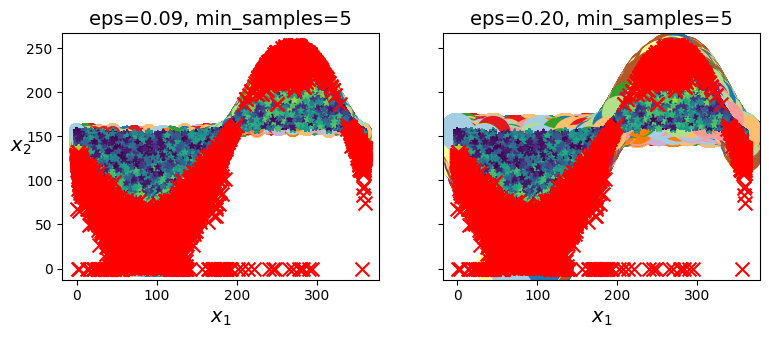

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Podemos considerar las muestras fuera de los grupos como anomalías, o bien usar un clasificador de vecinos cercanos para clasificar nuevas muestras.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [ ]:
X_new = np.array([[150, 150], [150, 200]])
knn.predict(X_new)

array([8746, 6256], dtype=int64)

In [ ]:
knn.predict_proba(X_new)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

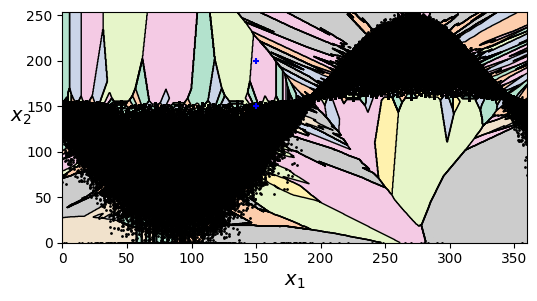

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=20, zorder=10)
plt.show()

# ¿Cómo funciona Gaussian Mixture Model (GMM)?

El **Gaussian Mixture Model (GMM)** es un modelo estadístico que asume que los datos provienen de una **combinación (mezcla)** de varias **distribuciones gaussianas** (o normales). Cada componente gaussiano representa un clúster, y cada punto de los datos tiene una probabilidad de pertenecer a cualquiera de estos componentes.

El GMM es muy útil en **clustering no supervisado** porque, a diferencia de K-means, puede encontrar clústeres de forma **elíptica** y permite que un punto pertenezca a varios clústeres con distintas probabilidades.

## Fundamentos del GMM

Una **distribución gaussiana (normal)** en una dimensión se define como:

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

Donde:
- $\mu$ es la **media** (centro de la distribución).
- $\sigma^2$ es la **varianza** (qué tan dispersos están los datos).

En el caso multidimensional, la distribución normal se define con una **media vectorial** y una **matriz de covarianza** para capturar las relaciones entre las dimensiones.

## Cómo Funciona el GMM

El GMM se basa en la suposición de que cada clúster en los datos sigue una **distribución normal**. El proceso del GMM incluye los siguientes pasos:

1. **Inicialización**:
   - Definimos un número fijo de componentes $K$.
   - Asignamos aleatoriamente los parámetros iniciales: **medias**, **covarianzas**, y **pesos** para cada componente.

2. **Algoritmo EM (Expectation-Maximization)**:
   El GMM utiliza el **algoritmo EM** para ajustar los parámetros del modelo. Este proceso se repite hasta que converge (es decir, hasta que los parámetros dejan de cambiar significativamente).

   - **Paso de Expectación (E-step)**:
     - Calcula la **probabilidad** de que cada punto de datos pertenezca a cada componente, en función de los parámetros actuales.
   
   - **Paso de Maximización (M-step)**:
     - Ajusta los parámetros (medias, covarianzas, y pesos) de los componentes para maximizar la **verosimilitud** de los datos.

3. **Asignación Final**:
   - Cada punto se asigna al componente con la mayor **probabilidad** (aunque internamente el GMM trabaja de forma probabilística).



Dataset reducido exitosamente a 1000 puntos


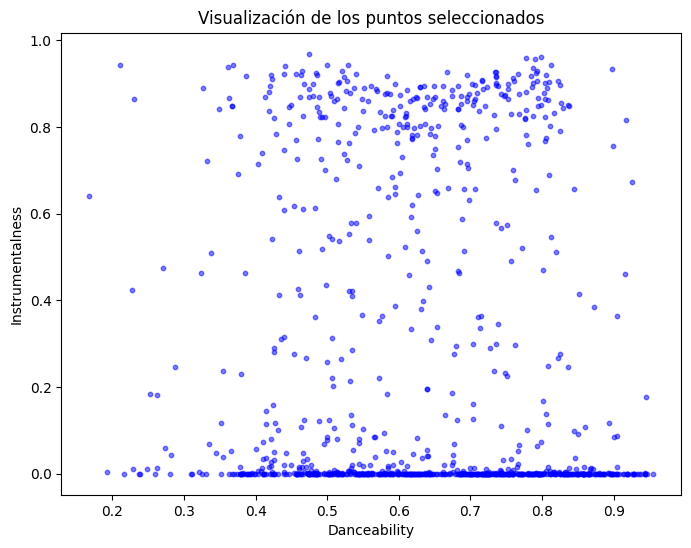

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_csv("genres_v2.csv", low_memory=False)

# Selección de columnas relevantes
X = df[['danceability', 'instrumentalness']].values

# Reducción del dataset usando muestreo aleatorio
np.random.seed(42)  # Asegura reproducibilidad
sample_size = 1000  # Tamaño del nuevo dataset reducido
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_reduced = X[indices]

# Mensaje actualizado con el número correcto de puntos seleccionados
print(f"Dataset reducido exitosamente a {sample_size} puntos")

# Visualización de los puntos
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10, c='b', alpha=0.5)
plt.title("Visualización de los puntos seleccionados")
plt.xlabel("Danceability")
plt.ylabel("Instrumentalness")
plt.show()


## Explicación Teórica del Código

### ¿Qué es Gaussian Mixture Model (GMM)?
Un **Gaussian Mixture Model (GMM)** es una técnica de aprendizaje no supervisado que permite identificar grupos o clústeres en los datos. Se basa en la suposición de que los datos provienen de varias distribuciones gaussianas, y cada distribución representa un grupo o componente diferente.

El modelo GMM asocia a cada punto de datos una probabilidad de pertenencia a cada componente gaussiano. Esto hace que sea más flexible que algoritmos como K-means, ya que puede modelar formas de clúster más complejas.

### Parámetros Importantes en el Código
1. **`n_components`**:  
   Especifica cuántos componentes gaussianos debe buscar el modelo. En este caso, el modelo intentará ajustar los datos a 3 distribuciones gaussianas diferentes.

2. **`n_init`**:  
   Determina cuántas veces se debe inicializar el algoritmo con diferentes valores aleatorios. De estas iteraciones, se selecciona el modelo con la mejor puntuación de verosimilitud. Esto ayuda a evitar quedar atrapado en un mínimo local.

3. **`random_state`**:  
   Establece una semilla para el generador de números aleatorios, lo que permite obtener resultados reproducibles cada vez que se ejecuta el modelo.

### ¿Cómo funciona `fit()`?
- La función `fit()` ajusta el modelo GMM a los datos de entrada `X`. Durante este proceso, el modelo estima los parámetros de cada distribución gaussiana, como las medias, las covarianzas y los pesos de cada componente.

### Aplicaciones Comunes de GMM
- **Clustering probabilístico**: Donde cada punto tiene una probabilidad de pertenecer a varios clústeres en lugar de estar asignado de manera rígida a uno solo.
- **Segmentación de datos**: En procesamiento de imágenes o análisis financiero.
- **Modelado de distribución de datos**: Para representar datos complejos donde se espera que diferentes regiones del espacio pertenezcan a diferentes distribuciones.


In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

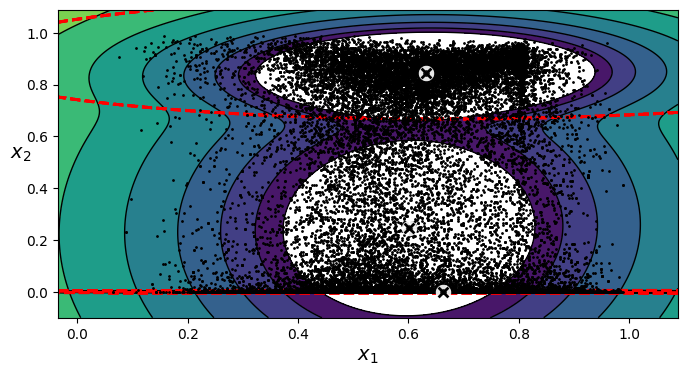

In [ ]:
from matplotlib.colors import LogNorm


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # Definir los límites del espacio
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1

    # Crear la cuadrícula de puntos
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    # Evaluar la densidad en cada punto de la cuadrícula
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Asegurar que Z sea positivo para evitar advertencias de LogNorm
    Z = np.maximum(Z, 1e-6)

    # Contornos con relleno y líneas principales
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    # Predecir las clases y trazar los contornos de las fronteras
    Z_pred = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, Z_pred, linewidths=2, colors='r', linestyles='dashed')

    # Graficar los puntos originales
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    # Etiquetas de los ejes
    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Generar la figura y graficar
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()


### Detalles del Atributo `weights_`
- **¿Qué representa?**  
  Cada peso es un valor entre 0 y 1, y la suma total de los pesos es igual a 1. Esto refleja la importancia relativa de cada componente en el modelo.
  
- **Interpretación**:  
  Si tienes tres componentes gaussianos, por ejemplo:


In [ ]:
gm.weights_

array([0.49279236, 0.26492368, 0.24228396])

## Explicación Teórica de `gm.means_`

El atributo **`gm.means_`** en un modelo de mezcla gaussiana (**Gaussian Mixture Model, GMM**) proporciona las **medias** (\`(\mu\)) de los componentes gaussianos encontrados por el modelo. Cada componente gaussiano tiene su propio conjunto de medias que define el **centro** de esa distribución específica dentro del espacio de datos.

### ¿Qué representa una media (\(\mu\))?
En una **distribución gaussiana (normal)**, la **media** es el valor central alrededor del cual se distribuyen los datos. En un contexto multidimensional (como datos en 2D o 3D), la media se representa como un vector que indica el centroide de cada componente en el espacio de características.

In [ ]:
gm.means_

array([[6.62807157e-01, 2.62248547e-04],
       [6.30835453e-01, 8.43902001e-01],
       [6.01008700e-01, 2.44955075e-01]])

## Explicación Teórica de `gm.covariances_`

El atributo **`gm.covariances_`** en un **Gaussian Mixture Model (GMM)** proporciona las **matrices de covarianza** (\(\Sigma\)) de cada uno de los componentes gaussianos. La **covarianza** describe la dispersión de los datos en cada componente gaussiano, es decir, cómo varían las diferentes dimensiones (o características) del conjunto de datos con respecto a la media.

### ¿Qué es la covarianza?
La **covarianza** mide la relación entre dos variables. En un contexto multidimensional, se representa con una **matriz de covarianza**, que captura cómo cada par de variables se correlaciona entre sí.

- **Covarianza positiva**: Ambas variables tienden a aumentar o disminuir juntas.
- **Covarianza negativa**: Cuando una variable aumenta, la otra tiende a disminuir.
- **Covarianza cercana a 0**: Indica que las variables no tienen una relación lineal clara.


In [ ]:
gm.covariances_

array([[[ 2.60836616e-02, -1.01636535e-05],
        [-1.01636535e-05,  1.56614144e-06]],

       [[ 1.91458616e-02,  3.19426734e-04],
        [ 3.19426734e-04,  5.08892257e-03]],

       [[ 2.45859957e-02,  8.38531475e-04],
        [ 8.38531475e-04,  5.38298264e-02]]])

## Explicación Teórica de `gm.predict(X)`

El método **`gm.predict(X)`** en un **Gaussian Mixture Model (GMM)** se utiliza para **predecir la asignación de clúster** para cada punto de los datos de entrada `X`. A diferencia de K-means, donde cada punto se asigna rígidamente a un clúster, el GMM asigna probabilísticamente cada punto al componente gaussiano más probable según las distribuciones ajustadas.


In [ ]:
gm.predict(X)

array([2, 0, 0, ..., 0, 2, 0], dtype=int64)

## Explicación Teórica de `gm.predict_proba(X)`

El método **`gm.predict_proba(X)`** en un **Gaussian Mixture Model (GMM)** calcula las **probabilidades** de que cada punto en los datos de entrada `X` pertenezca a cada uno de los **componentes gaussianos**. A diferencia de `gm.predict(X)`, que asigna un único clúster a cada punto, este método proporciona un enfoque probabilístico, mostrando cuán probable es que un punto pertenezca a varios componentes simultáneamente.

### ¿Cómo funciona `gm.predict_proba(X)`?
Cuando se llama a este método, el GMM:
1. Evalúa las probabilidades de cada punto para **todos los componentes gaussianos** del modelo.
2. Devuelve una **matriz de probabilidades**, donde cada fila corresponde a un punto de datos y cada columna a un componente gaussiano.

In [ ]:
gm.predict_proba(X)

array([[6.23939588e-022, 1.41222284e-029, 1.00000000e+000],
       [9.98750938e-001, 2.88586807e-033, 1.24906168e-003],
       [9.99158076e-001, 1.28307618e-033, 8.41924431e-004],
       ...,
       [9.97108708e-001, 7.86566583e-033, 2.89129168e-003],
       [3.48391889e-117, 3.21369251e-028, 1.00000000e+000],
       [9.97955966e-001, 6.12382445e-033, 2.04403413e-003]])

## Explicación Teórica de `gm.sample(n_samples)`

El método **`gm.sample(n_samples)`** en un **Gaussian Mixture Model (GMM)** genera **nuevas muestras** basadas en las distribuciones gaussianas ajustadas durante el entrenamiento del modelo. Es decir, este método permite simular nuevos datos que siguen la misma estructura probabilística que el modelo aprendió del conjunto de datos original.

In [ ]:
X_new, y_new = gm.sample(2)
X_new

array([[0.55820337, 0.0022066 ],
       [0.56277302, 0.1916896 ]])

In [ ]:
y_new

array([0, 2])

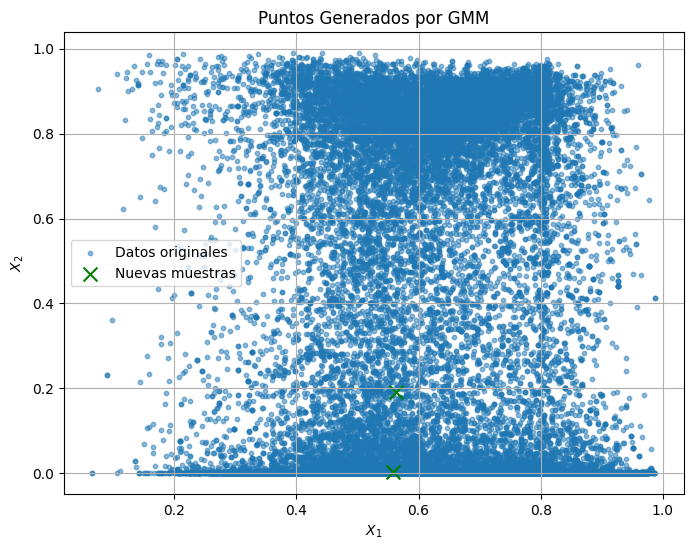

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5, label='Datos originales')
plt.scatter(X_new[:, 0], X_new[:, 1], color='green', s=100, marker='x', label='Nuevas muestras')

plt.title('Puntos Generados por GMM')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.grid(True)
plt.show()

Definiendo un valor límite podemos detectar anomalías en los datos.

## Explicación Teórica del Código: Detección de Anomalías con `score_samples()`

Este fragmento de código utiliza un **Gaussian Mixture Model (GMM)** para identificar **anomalías** en los datos. La idea detrás de este enfoque es que los puntos de datos que tienen una densidad muy baja, según la distribución ajustada por el modelo, se consideran **anómalos** o **outliers**.

### ¿Cómo funciona `gm.score_samples(X)`?
El método **`gm.score_samples(X)`** calcula la **log-densidad** de probabilidad para cada punto en el conjunto de datos `X`. Esta función mide cuán probable es que un punto pertenezca a las distribuciones gaussianas del modelo.

- **Puntos con alta densidad**: Son más probables y típicos según la distribución aprendida.
- **Puntos con baja densidad**: Son menos probables y podrían considerarse **anomalías**.

El resultado de **`score_samples()`** es un array con la **log-densidad** para cada punto del conjunto `X`.

### Explicación del Código

```python
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]


In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

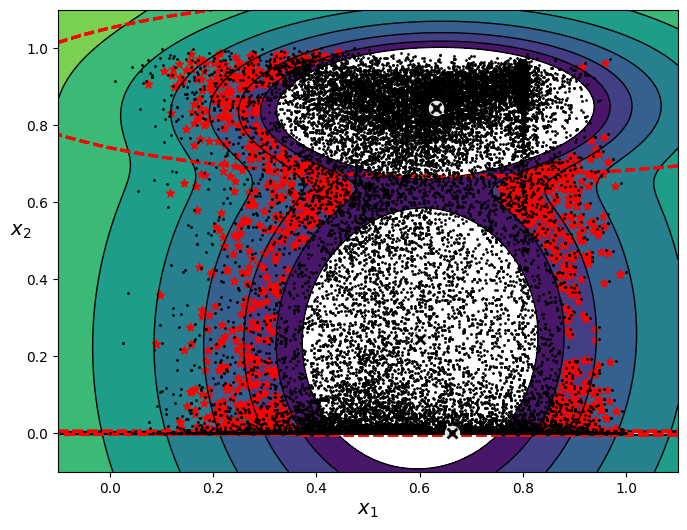

In [ ]:
# Escalar los datos para mejorar la visualización
from sklearn.preprocessing import MinMaxScaler

# Escalado de las características entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Graficar con los datos escalados
plt.figure(figsize=(8, 6))
plot_gaussian_mixture(gm, X_scaled)

# Ajuste del límite superior del eje y para mejorar la visibilidad
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(-0.1, 1.1)  # Ajuste del rango de y

# Mostrar el gráfico con el eje corregido
plt.show()


Una alternativa muy usada para seleccionar el número de grupos óptimos es el uso de *Bayesian Gaussian Mixtures*, ya que pueden asignar pesos cercanos a 0 a grupos innecesarios.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.51, 0.12, 0.03, 0.03, 0.05, 0.01, 0.07, 0.09, 0.06, 0.04])